In [55]:
from baixa_curvas import bmf
from datetime import date, timedelta, datetime
import pandas as pd
from business_days.bizdays import Calendar, VectorizedOps

cal = Calendar()

In [23]:
cal.load(filename='business_days/ANBIMA.cal')

Calendar: ANBIMA
Start: 2000-01-01
End: 2078-12-25
Weekdays: 
Holidays: 948
Financial: True

In [93]:
start_date = '2010-01-01'
yesterday = str(date.today() - timedelta(1))

lista_de_dias = cal.seq(start_date, yesterday)

In [94]:
# sourcery skip: remove-str-from-print
df_pre_full = pd.DataFrame()

for dia in lista_de_dias:
    gera_bmf = bmf(dia)
    df_pre = gera_bmf._baixa_pre()
    df_pre.reset_index(inplace=True)
    df_pre['Data'] = dia
    df_pre.columns = ['vertices','taxas252', 'taxas360', 'Data']
    df_pre_full = df_pre_full.append(df_pre)
    print(str(dia))

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-29
2010-01-30
2010-01-31
2010-02-01
2010-02-02
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-10
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-18
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-27
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-16
2010-03-17
2010-03-18
2010-03-19
2010-03-20
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-25
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01

KeyboardInterrupt: 

In [97]:
df_pre_full.to_csv('vertices_di.csv')

<AxesSubplot:xlabel='Data'>

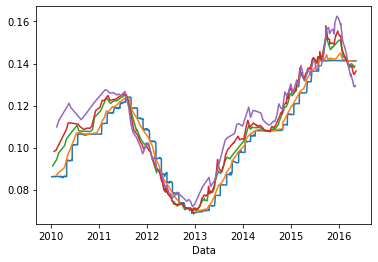

In [109]:
df_pre_full[df_pre_full['vertices']==1].set_index('Data')['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==50].set_index('Data')['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==171].set_index('Data')['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==252].set_index('Data')['taxas252'].plot()
df_pre_full[df_pre_full['vertices']==504].set_index('Data')['taxas252'].plot()

In [14]:
df_cupom = gera_bmf._baixa_cupom()
df_cupom['Data'] = dia
df_cupom.columns = ['taxas360', 'Data']

<AxesSubplot:>

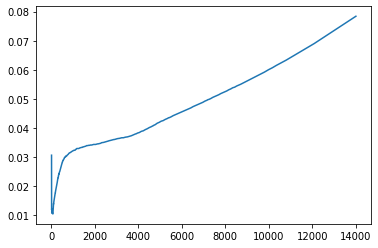

In [20]:
df_cupom['taxas360'][5:].plot()

<AxesSubplot:>

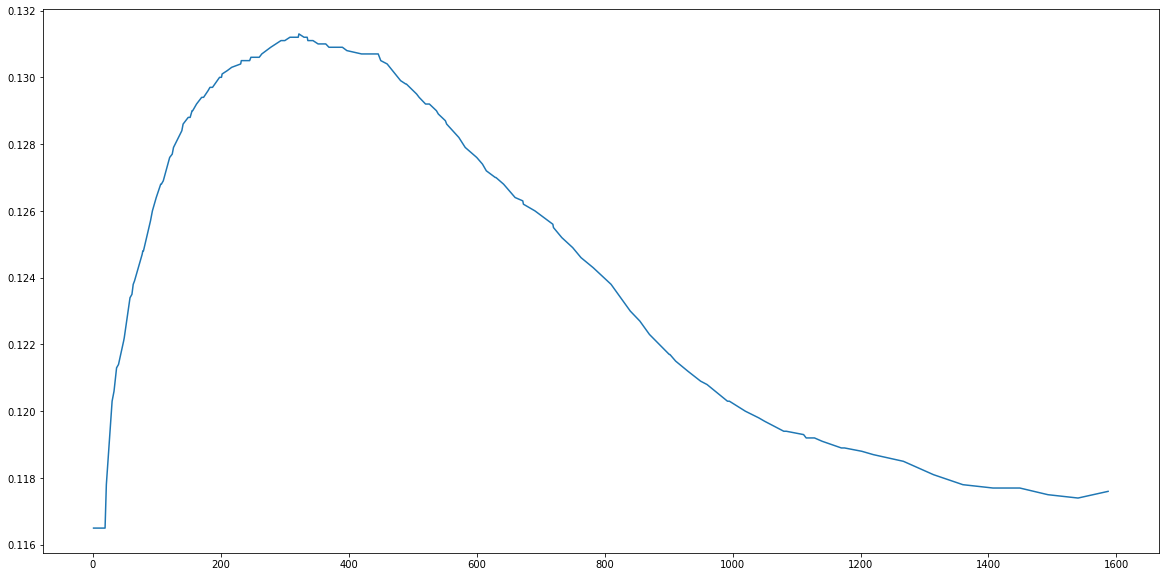

In [27]:
df_pre['taxas252'][:150].plot(figsize =(20,10))

In [ ]:
gera_bmf